# Tugas Praktikum 4

## Tugas 1

In [55]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


### Import Data

In [56]:
data = pd.read_csv('voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [57]:
data.shape

(3168, 21)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [59]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


### Encoding

In [60]:
le = LabelEncoder()

data['label'] = le.fit_transform(data['label'])

In [61]:
data['label']

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int32

### Cek korelasi

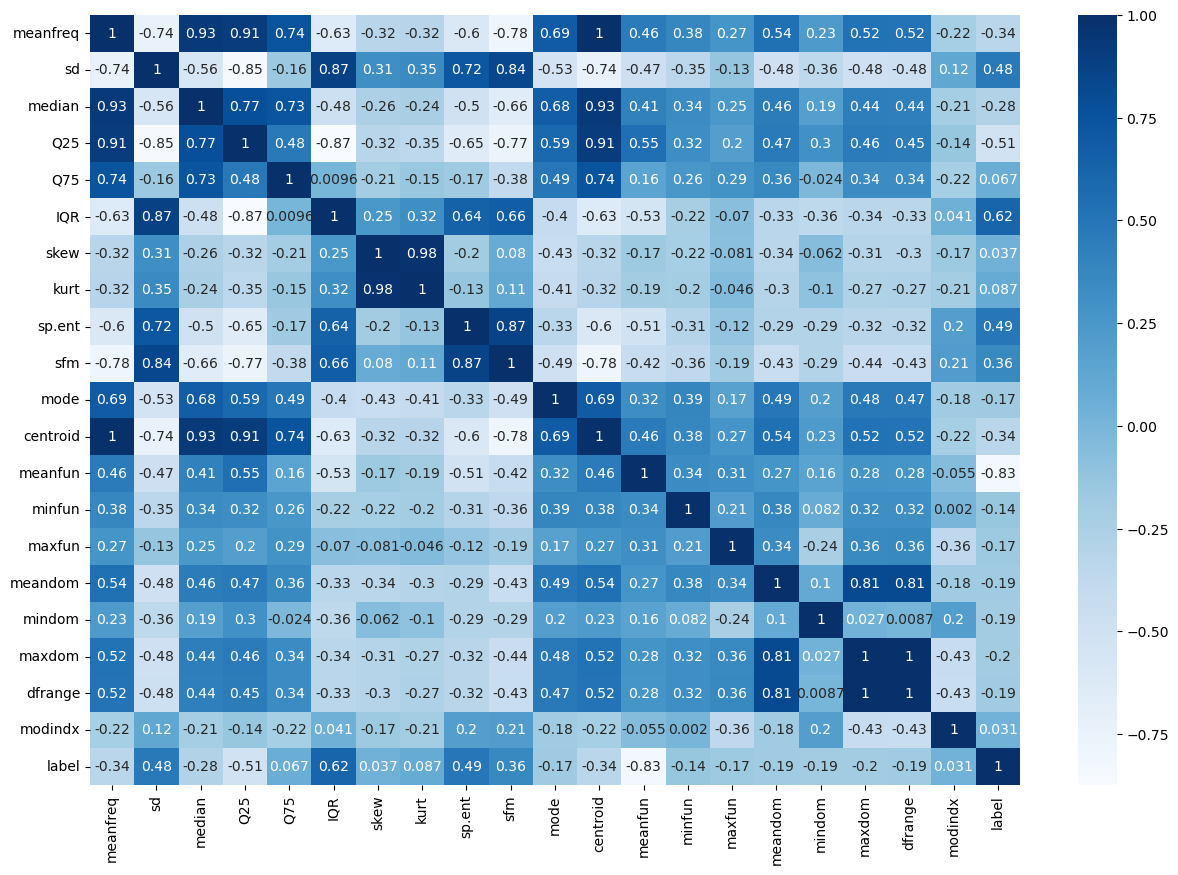

In [62]:
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.gcf().set_size_inches(15,10)
plt.show()

### Split data

In [63]:
# Separate features (X) and labels (y)
X = data.drop('label', axis=1)  # Features /Independent
y = data['label']  # Labels /Dependent

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, train_size=0.7)

### SVM

In [65]:
model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

### Predict and evaluate

In [66]:
y_pred = model.predict(X_test) #predict

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9284963196635121


In [67]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[427  58]
 [ 10 456]]


In [68]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93       485
           1       0.89      0.98      0.93       466

    accuracy                           0.93       951
   macro avg       0.93      0.93      0.93       951
weighted avg       0.93      0.93      0.93       951



## Tugas 2

### Load data

In [69]:
data = pd.read_csv('spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Drop Kolom

In [70]:
data = data.drop(data.iloc[:,2:], axis=1)

data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Ubah nama kolom

In [71]:
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

data = data.rename(columns=new_cols)

data.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Inspeksi data

In [72]:
print(data['Labels'].value_counts())
print('\n')

print(data.info())
print('\n')

print(data.describe())

ham     4825
spam     747
Name: Labels, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


### Encode Label

In [73]:
new_labels = {
    'spam': 1,
    'ham': 0
}

data['Labels'] = data['Labels'].map(new_labels)

data.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Memisahkan Fitur dengan Label

In [74]:
X = data['SMS'].values
y = data['Labels'].values

### Training dan Evaluasi Model

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

bow = CountVectorizer()

In [76]:
X_train = bow.fit_transform(X_train)
X_test = bow.transform(X_test)

In [77]:
mnb = MultinomialNB()

mnb.fit(X_train, y_train)

y_pred_train = mnb.predict(X_train)

acc_train = accuracy_score(y_train, y_pred_train)

y_pred_test = mnb.predict(X_test)

acc_test = accuracy_score(y_test, y_pred_test)

print('Hasil akurasi data train: {acc_train}')
print('Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: {acc_train}
Hasil akurasi data test: {acc_test}


## Tugas 3

###  Vectorize feature 

In [78]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

In [79]:
X = data['SMS'].values
y = data['Labels'].values

X = tfidf_vectorizer.fit_transform(X)

In [80]:
print(tfidf_vectorizer.get_feature_names_out())

['00' '000' '000pes' ... 'ûïharry' 'ûò' 'ûówell']


In [81]:
mnb = MultinomialNB()

mnb.fit(X_train, y_train)

y_pred_train = mnb.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)

y_pred_test = mnb.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)

print(f'Accuracy on train data: {acc_train}')
print(f'Accuracy on test data:  {acc_test}')

Accuracy on train data: 0.9946152120260264
Accuracy on test data:  0.97847533632287
